In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)

In [98]:
# read the csvs
test_dataset = pd.read_csv('test_dataset.csv')
train_dataset = pd.read_csv('train_dataset.csv')

train_X = train_dataset.drop(columns=['imdb_score_binned'])
train_y = train_dataset['imdb_score_binned']

In [101]:
train_dataset

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned
0,1,Roger Allers,186,73,28,847,Nathan Lane,2000,422783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,6458,Niketa Calame,0,king|prince|scar|uncle|unnecessary guilt,656,English,USA,G,1994,886,17000,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4
1,2,George A. Romero,252,97,0,233,Shawn Roberts,654,20433940,Horror,Tony Nappo,Land of the Dead,78883,1876,Pedro Miguel Arce,8,apocalypse|mercenary|skyscraper|urban setting|...,662,English,Canada,R,2005,529,0,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2
2,3,David Gordon Green,232,117,234,221,Tye Sheridan,12000,371897,Drama,Nicolas Cage,Joe,36494,13607,Ronnie Gene Blevins,2,alcoholic|cigarette smoking|father son relatio...,118,English,USA,R,2013,1000,11000,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2
3,4,John Carpenter,297,109,0,145,Richard Masur,957,13782838,Horror|Mystery|Sci-Fi,Wilford Brimley,The Thing,258078,1757,David Clennon,0,alien creature|alien life form|antarctica|isol...,911,English,USA,R,1982,163,23000,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4
4,5,Peter Jackson,297,171,0,857,Orlando Bloom,16000,313837577,Action|Adventure|Drama|Fantasy,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,1238746,22342,Billy Boyd,2,elf|hobbit|middle earth|quest|ring,5060,English,New Zealand,PG-13,2001,5000,21000,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,3000,Ken Kwapis,161,129,42,49,Sabrina Revelle,97,93952276,Comedy|Drama|Romance,Carmen Perez,He's Just Not That Into You,132048,318,Sachiko Ishida,7,advertising|bar|dating|lingerie slip|six word ...,203,English,USA,PG-13,2009,50,12000,[-2.3482253e-03 4.0821606e-04 -4.6702172e-04 ...,0.000750,2
3000,3001,Ron Howard,393,123,2000,471,Olivia Wilde,26000,26903709,Action|Biography|Drama|Sport,Chris Hemsworth,Rush,312629,37206,Alexandra Maria Lara,0,1970s|female rear nudity|formula 1|rivalry|sex...,475,English,UK,R,2013,10000,83000,[ 1.6231873e-03 -4.9172580e-04 3.6536737e-03 ...,0.003302,4
3001,3002,F. Gary Gray,216,118,473,963,Leslie Bibb,18000,73343413,Crime|Drama|Thriller,Gerard Butler,Law Abiding Citizen,217480,22517,Michael Kelly,0,attorney|deal|district attorney|investigation|...,429,English,USA,R,2009,1000,21000,[-1.0675089e-03 1.7000491e-03 -2.9880603e-04 ...,0.003302,3
3002,3003,Nadine Labaki,109,95,0,0,Adel Karam,227,1060591,Comedy|Drama|Romance,Yasmine Al Massri,Caramel,9750,231,Nadine Labaki,0,caramel|friendship|police|secret|suitor,66,Arabic,France,PG,2007,4,0,[-1.28144643e-03 -1.88259745e-03 1.82478712e-...,0.000300,3


In [99]:
test_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_genre.npy'))
test_doc2vec_features_genre_df = test_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

train_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_genre.npy'))
train_doc2vec_features_genre_df = train_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

test_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_plot_keywords.npy'))
test_doc2vec_features_plot_keywords_df = test_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

train_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_plot_keywords.npy'))
train_doc2vec_features_plot_keywords_df = train_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

test_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/test_fasttext_title_embeddings.npy'))
test_fasttext_title_embeddings_df = test_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

train_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/train_fasttext_title_embeddings.npy'))
train_fasttext_title_embeddings_df = train_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})


In [100]:
train_fasttext_title_embeddings_df

,test_fasttext_title_vec_0,test_fasttext_title_vec_1,test_fasttext_title_vec_2,test_fasttext_title_vec_3,test_fasttext_title_vec_4,test_fasttext_title_vec_5,test_fasttext_title_vec_6,test_fasttext_title_vec_7,test_fasttext_title_vec_8,test_fasttext_title_vec_9,test_fasttext_title_vec_10,test_fasttext_title_vec_11,test_fasttext_title_vec_12,test_fasttext_title_vec_13,test_fasttext_title_vec_14,test_fasttext_title_vec_15,test_fasttext_title_vec_16,test_fasttext_title_vec_17,test_fasttext_title_vec_18,test_fasttext_title_vec_19,test_fasttext_title_vec_20,test_fasttext_title_vec_21,test_fasttext_title_vec_22,test_fasttext_title_vec_23,test_fasttext_title_vec_24,test_fasttext_title_vec_25,test_fasttext_title_vec_26,test_fasttext_title_vec_27,test_fasttext_title_vec_28,test_fasttext_title_vec_29,test_fasttext_title_vec_30,test_fasttext_title_vec_31,test_fasttext_title_vec_32,test_fasttext_title_vec_33,test_fasttext_title_vec_34,test_fasttext_title_vec_35,test_fasttext_title_vec_36,test_fasttext_title_vec_37,test_fasttext_title_vec_38,test_fasttext_title_vec_39,test_fasttext_title_vec_40,test_fasttext_title_vec_41,test_fasttext_title_vec_42,test_fasttext_title_vec_43,test_fasttext_title_vec_44,test_fasttext_title_vec_45,test_fasttext_title_vec_46,test_fasttext_title_vec_47,test_fasttext_title_vec_48,test_fasttext_title_vec_49,test_fasttext_title_vec_50,test_fasttext_title_vec_51,test_fasttext_title_vec_52,test_fasttext_title_vec_53,test_fasttext_title_vec_54,test_fasttext_title_vec_55,test_fasttext_title_vec_56,test_fasttext_title_vec_57,test_fasttext_title_vec_58,test_fasttext_title_vec_59,test_fasttext_title_vec_60,test_fasttext_title_vec_61,test_fasttext_title_vec_62,test_fasttext_title_vec_63,test_fasttext_title_vec_64,test_fasttext_title_vec_65,test_fasttext_title_vec_66,test_fasttext_title_vec_67,test_fasttext_title_vec_68,test_fasttext_title_vec_69,test_fasttext_title_vec_70,test_fasttext_title_vec_71,test_fasttext_title_vec_72,test_fasttext_title_vec_73,test_fasttext_title_vec_74,test_fasttext_title_vec_75,test_fasttext_title_vec_76,test_fasttext_title_vec_77,test_fasttext_title_vec_78,test_fasttext_title_vec_79,test_fasttext_title_vec_80,test_fasttext_title_vec_81,test_fasttext_title_vec_82,test_fasttext_title_vec_83,test_fasttext_title_vec_84,test_fasttext_title_vec_85,test_fasttext_title_vec_86,test_fasttext_title_vec_87,test_fasttext_title_vec_88,test_fasttext_title_vec_89,test_fasttext_title_vec_90,test_fasttext_title_vec_91,test_fasttext_title_vec_92,test_fasttext_title_vec_93,test_fasttext_title_vec_94,test_fasttext_title_vec_95,test_fasttext_title_vec_96,test_fasttext_title_vec_97,test_fasttext_title_vec_98,test_fasttext_title_vec_99
0,-0.004198,0.004294,-0.001196,0.003681,0.003257,-0.003500,0.001007,0.001118,0.004264,-0.001038,-0.003645,-0.000695,-0.001152,0.002203,-0.001775,-0.003194,-0.000658,0.000175,-0.002242,-0.003018,-0.003591,-0.004765,-0.002165,0.005117,-0.008737,-0.005500,-0.001863,-0.001681,-0.001909,-0.001537,0.000733,-0.003610,0.004648,-0.007456,-0.002215,0.010004,0.003100,0.000978,0.002515,-0.002356,0.008634,-0.005600,-0.001682,-0.003847,-0.001544,-0.003929,-0.002623,0.003756,0.001496,0.006078,-0.003972,-0.005442,0.009487,-0.005316,-0.001491,-0.002354,0.005490,-0.006967,0.000027,0.001806,0.002138,-0.000619,-0.003603,0.000727,-0.000105,0.004909,0.004728,-0.002344,0.002327,0.003053,-0.000550,-0.001742,-0.003202,-0.004739,-0.000526,0.001017,-0.002533,-0.002629,-0.004348,0.001012,0.002114,-0.003208,-0.004303,0.000234,-0.002876,-0.008473,0.009618,0.001791,0.000422,-0.001956,0.004746,0.003770,0.001390,0.003076,-0.008132,0.001598,0.006643,0.002400,-0.003933,-0.005527
1,-0.004759,0.002651,-0.000380,0.001635,0.003939,-0.003758,-0.000156,0.004196,0.001613,-0.000283,0.000232,-0.002090,0.001715,0.003235,-0.001840,-0.003230,0.000399,0.002757,-0.000413,-0.002759,-0.000612,-0.005033,-0.000715,0.002310,-0.004604,-0.004663,-0.003028,-0.002849,-0.001744,0.000910,0.000863,-0.000978,0.004336,-0.007024,-0.001817,0.008141,-0.

In [126]:
rfc = RandomForestClassifier()

scores = cross_val_score(rfc, train_doc2vec_features_genre_df, train_y, cv=5)

print(scores)
print(np.mean(scores))

[0.62396007 0.56738769 0.59400998 0.60732113 0.595     ]
0.5975357737104826


In [125]:
rfc = RandomForestClassifier()

scores = cross_val_score(rfc, train_fasttext_title_embeddings_df, train_y, cv=5)

print(scores)
print(np.mean(scores))

[0.60399334 0.62562396 0.6156406  0.61896839 0.61166667]
0.6151785912368275


I will make a conscious choice NOT to use the features countvec. This is because it does not inlcude actor_3_name. Instead I will create my own embedding / decomposition of 'people' features (actor 1, 2, 3 and director). Similarly to fasttext and doc2vec, I will make it columns.

I will use TruncatedSVD here, because it is particuarly good for sparse matrices.

In [6]:
# firstly the encoding. I will choose to ignore unknown values
from sklearn.preprocessing import OneHotEncoder

# choices here: I will create a separate category for people who only appear ONCE. As such, my min frequency is 2 for it to have its own category
# then during the transform, if something hasn't been seen before, it will be put into this 'infrequent' category instead of being ignored.
# I hope to capture more information like this, because there might be ~some value in knowing if a person has done more than one movie (this might
# be an indication they were 'good' enough to do another movie)

encoder = OneHotEncoder(min_frequency=2, handle_unknown='infrequent_if_exist')

to_be_encoded_X_train = train_X[['director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name']]
encoded_X_train = encoder.fit_transform(to_be_encoded_X_train)
encoded_X_train_df = pd.DataFrame.sparse.from_spmatrix(encoded_X_train, columns=encoder.get_feature_names_out(['director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name']))


to_be_encoded_X_test = test_dataset[['director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name']]
encoded_X_test = encoder.transform(to_be_encoded_X_test)
encoded_X_test_df = pd.DataFrame.sparse.from_spmatrix(encoded_X_test, columns=encoder.get_feature_names_out(['director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name']))
encoded_X_test_df

director_name_Adam McKay  director_name_Adam Shankman  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   
..                        ...                          ...   
747                       0.0                          0.0   
748                       0.0                          0.0   
749                       0.0                          0.0   
750                       0.0                          0.0   
751                       0.0                          0.0   

     director_name_Adrian Lyne  director_name_Akiva Schaffer  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   
..                         ...                           ...   
747                        0.0                           0.0   
748                        0.0                           0.0   
749                        0.0                           0.0   
750                        0.0                           0.0   
751                        0.0                           0.0   

     director_name_Alan J. Pakula  director_name_Alan Parker  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   
..                            ...                        ...   
747                           0.0                        0.0   
748                           0.0                        0.0   
749                           0.0                        0.0   
750                           0.0                        0.0   
751                           0.0                        0.0   

     director_name_Alan Taylor  director_name_Albert Hughes  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
747                        0.0                          0.0   
748                        0.0                          0.0   
749                        0.0                          0.0   
750                        0.0                          0.0   
751                        0.0                          0.0   

     director_name_Alejandro Amenábar  director_name_Alejandro G. Iñárritu  \
0                                 0.0                                  0.0   
1                                 0.0                                  0.0   
2                                 0.0                                  0.0   
3                                 0.0                                  0.0   
4                                 0.0                                  0.0   
..                                ...                                  ...   
747                               0.0                                  0.0   
748                               0.0                                  0.0   
749                               0.0                                  0.0   
750                               0.0                                  0.0   
751                               0.0                                  0.0   

     director_name_Alex Kend

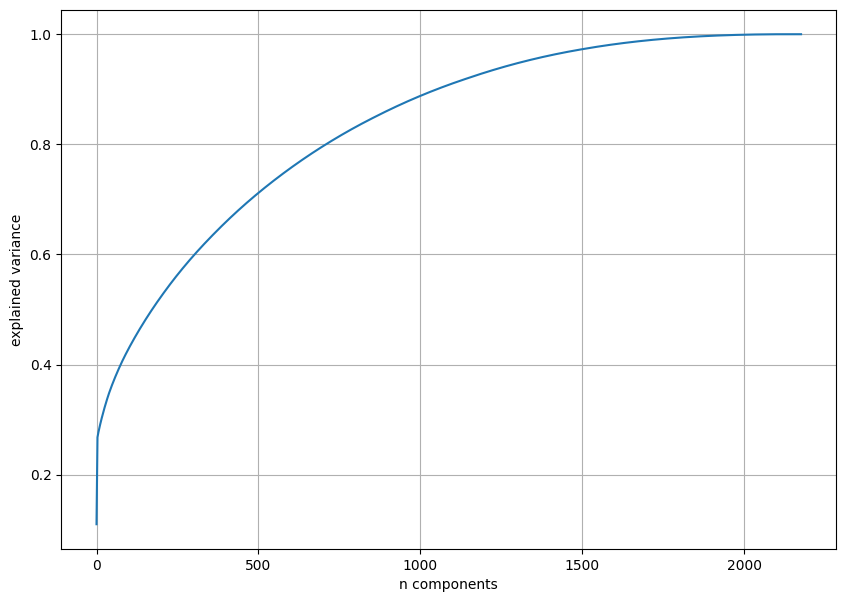

In [7]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

svd = TruncatedSVD(n_components = encoded_X_train_df.shape[1] - 1)

decomposed_x_train_people_sparse = csr_matrix(encoded_X_train_df)
decomposed_x_train_people = svd.fit_transform(decomposed_x_train_people_sparse)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('explained variance')
plt.grid(True)
plt.show()

Setting n_components to 100 seems ~okay. It still explains around half of the variance with a vector of 100 values

I will now try to combine the people (actors and directors) into some vector that contains their meaning using TruncatedSVD

TruncatedSVD is particularly good for dimensionality recution with sparse matrices

In [8]:
decomposed_x_train_people_sparse = csr_matrix(encoded_X_train_df)
decomposed_x_test_people_sparse = csr_matrix(encoded_X_test_df)

svd = TruncatedSVD(n_components=100, random_state=99)

decomposed_x_train_people = svd.fit_transform(decomposed_x_train_people_sparse)
decomposed_x_test_people = svd.transform(decomposed_x_test_people_sparse)

decomposed_x_train_people_df = pd.DataFrame(decomposed_x_train_people, columns=[f"people_decomposed_{i}" for i in range(100)])
decomposed_x_test_people_df = pd.DataFrame(decomposed_x_test_people, columns=[f"people_decomposed_{i}" for i in range(100)])

In [9]:
decomposed_x_test_people_df

,people_decomposed_0,people_decomposed_1,people_decomposed_2,people_decomposed_3,people_decomposed_4,people_decomposed_5,people_decomposed_6,people_decomposed_7,people_decomposed_8,people_decomposed_9,people_decomposed_10,people_decomposed_11,people_decomposed_12,people_decomposed_13,people_decomposed_14,people_decomposed_15,people_decomposed_16,people_decomposed_17,people_decomposed_18,people_decomposed_19,people_decomposed_20,people_decomposed_21,people_decomposed_22,people_decomposed_23,people_decomposed_24,people_decomposed_25,people_decomposed_26,people_decomposed_27,people_decomposed_28,people_decomposed_29,people_decomposed_30,people_decomposed_31,people_decomposed_32,people_decomposed_33,people_decomposed_34,people_decomposed_35,people_decomposed_36,people_decomposed_37,people_decomposed_38,people_decomposed_39,people_decomposed_40,people_decomposed_41,people_decomposed_42,people_decomposed_43,people_decomposed_44,people_decomposed_45,people_decomposed_46,people_decomposed_47,people_decomposed_48,people_decomposed_49,people_decomposed_50,people_decomposed_51,people_decomposed_52,people_decomposed_53,people_decomposed_54,people_decomposed_55,people_decomposed_56,people_decomposed_57,people_decomposed_58,people_decomposed_59,people_decomposed_60,people_decomposed_61,people_decomposed_62,people_decomposed_63,people_decomposed_64,people_decomposed_65,people_decomposed_66,people_decomposed_67,people_decomposed_68,people_decomposed_69,people_decomposed_70,people_decomposed_71,people_decomposed_72,people_decomposed_73,people_decomposed_74,people_decomposed_75,people_decomposed_76,people_decomposed_77,people_decomposed_78,people_decomposed_79,people_decomposed_80,people_decomposed_81,people_decomposed_82,people_decomposed_83,people_decomposed_84,people_decomposed_85,people_decomposed_86,people_decomposed_87,people_decomposed_88,people_decomposed_89,people_decomposed_90,people_decomposed_91,people_decomposed_92,people_decomposed_93,people_decomposed_94,people_decomposed_95,people_decomposed_96,people_decomposed_97,people_decomposed_98,people_decomposed_99
0,1.925384,0.327947,0.299314,0.304069,-0.004142,-0.007315,-0.005737,0.000056,-0.004512,-0.002994,-0.001293,0.001573,-0.004236,-0.004361,-0.003873,-0.004454,0.001847,-0.002700,-0.004020,0.000173,-0.001847,-0.002629,0.000167,-0.005554,-0.001189,-0.001389,-0.001078,-0.000032,0.000692,-0.004198,-0.001996,-0.003626,-0.002249,-0.000618,0.001571,0.001232,-0.000887,0.000072,-0.006204,-0.002008,-0.001768,-0.002813,-0.000887,-0.003276,-0.000303,-0.000477,-0.001972,-0.002369,-0.001150,-0.000985,0.001903,0.001189,-0.000289,-0.002290,-0.000399,-0.000595,0.000506,-0.006680,-0.000142,0.000533,0.000911,-0.002444,-0.001355,-0.001788,-0.003250,-0.000539,0.000879,-0.003021,-0.002090,-0.002064,0.001208,-0.002785,-0.003952,-0.003350,0.001678,-0.001456,-0.002368,-0.001514,0.000069,-0.000694,0.003292,0.000076,-0.000625,0.001089,-0.002960,-0.004954,0.001898,-0.000456,0.000129,-0.001423,0.000751,-0.000131,0.000555,-0.001112,0.001914,0.000710,-0.000660,-0.000545,-0.002247,-0.001505
1,1.022049,-0.438183,-0.262348,0.834247,0.029140,0.000795,-0.012586,-0.017996,-0.010068,0.035920,-0.010393,0.080899,-0.021114,0.023942,0.006372,0.001944,0.009032,-0.007223,-0.009396,-0.001601,-0.010525,-0.006190,-0.012579,-0.005293,0.003393,-0.000537,-0.005946,0.002459,-0.003319,0.009284,0.016671,0.002019,-0.002013,0.007652,-0.017370,0.001790,-0.007930,0.014192,-0.000944,0.002075,0.005548,-0.003441,0.087503,-0.025205,-0.026826,0.018379,0.038765,0.001240,-0.039690,0.010171,-0.021008,-0.007908,-0.017208,-0.001075,0.009374,-0.014277,-0.039421,0.032124,-0.025874,0.035854,0.015303,0.057001,-0.018279,-0.023091,0.029329,0.084173,0.012835,0.029541,0.016942,-0.045728,-0.056184,0.012854,-0.073202,0.020232,0.036736,-0.002419,-0.081203,0.045374,-0.040384,0.066934,-0.150798,0.007698,-0.010660,-0.051630,0.213725,-0.079193,-0.019768,-0.014863,0.003478,-0.055281,0.085599,-0.114350,0.032823,0.006615,-0.003211,-0.081868,0.059439,-0.096687,-0.

Next I will one-hot encode language, country and content rating

In [10]:
encoder = OneHotEncoder(min_frequency=2, handle_unknown='infrequent_if_exist')

# lcr here stands for language, country, rating
lcr_to_be_encoded_X_train = train_X[['language', 'country', 'content_rating']]
lcr_encoded_X_train = encoder.fit_transform(lcr_to_be_encoded_X_train)
lcr_encoded_X_train_df = pd.DataFrame.sparse.from_spmatrix(lcr_encoded_X_train, columns=encoder.get_feature_names_out(['language', 'country', 'content_rating']))


lcr_to_be_encoded_X_test = test_dataset[['language', 'country', 'content_rating']]
lcr_encoded_X_test = encoder.transform(lcr_to_be_encoded_X_test)
lcr_encoded_X_test_df = pd.DataFrame.sparse.from_spmatrix(lcr_encoded_X_test, columns=encoder.get_feature_names_out(['language', 'country', 'content_rating']))
lcr_encoded_X_test_df

,language_Aboriginal,language_Cantonese,language_Danish,language_Dari,language_Dutch,language_English,language_French,language_German,language_Hindi,language_Indonesian,language_Italian,language_Japanese,language_Korean,language_Mandarin,language_Norwegian,language_Persian,language_Portuguese,language_Spanish,language_Thai,language_infrequent_sklearn,country_Argentina,country_Australia,country_Brazil,country_Canada,country_China,country_Czech Republic,country_Denmark,country_France,country_Germany,country_Hong Kong,country_Hungary,country_India,country_Iran,country_Ireland,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_infrequent_sklearn,content_rating_Approved,content_rating_G,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,content_rating_infrequent_sklearn
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
748,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
749,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
total_train_x_df = pd.concat([train_X, train_doc2vec_features_genre_df,train_doc2vec_features_plot_keywords_df, train_fasttext_title_embeddings_df,decomposed_x_train_people_df, lcr_encoded_X_train_df], axis=1)
total_train_x_df = total_train_x_df.drop(columns=['genres', 'plot_keywords', 'title_embedding','movie_title', 'language', 'country', 'content_rating', 'director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name', 'id'])

total_test_x_df = pd.concat([test_dataset, test_doc2vec_features_genre_df,test_doc2vec_features_plot_keywords_df, test_fasttext_title_embeddings_df,decomposed_x_test_people_df, lcr_encoded_X_test_df],axis=1)
total_test_x_df = total_test_x_df.drop(columns=['genres', 'plot_keywords', 'title_embedding','movie_title', 'language', 'country', 'content_rating', 'director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name', 'id'])


In [12]:
total_train_x_df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,genre_vec_0,genre_vec_1,genre_vec_2,genre_vec_3,genre_vec_4,genre_vec_5,genre_vec_6,genre_vec_7,genre_vec_8,genre_vec_9,genre_vec_10,genre_vec_11,genre_vec_12,genre_vec_13,genre_vec_14,genre_vec_15,genre_vec_16,genre_vec_17,genre_vec_18,genre_vec_19,genre_vec_20,genre_vec_21,genre_vec_22,genre_vec_23,genre_vec_24,genre_vec_25,genre_vec_26,genre_vec_27,genre_vec_28,genre_vec_29,genre_vec_30,genre_vec_31,genre_vec_32,genre_vec_33,genre_vec_34,genre_vec_35,genre_vec_36,genre_vec_37,genre_vec_38,genre_vec_39,genre_vec_40,genre_vec_41,genre_vec_42,genre_vec_43,genre_vec_44,genre_vec_45,genre_vec_46,genre_vec_47,genre_vec_48,genre_vec_49,genre_vec_50,genre_vec_51,genre_vec_52,genre_vec_53,genre_vec_54,genre_vec_55,genre_vec_56,genre_vec_57,genre_vec_58,genre_vec_59,genre_vec_60,genre_vec_61,genre_vec_62,genre_vec_63,genre_vec_64,genre_vec_65,genre_vec_66,genre_vec_67,genre_vec_68,genre_vec_69,genre_vec_70,genre_vec_71,genre_vec_72,genre_vec_73,genre_vec_74,genre_vec_75,genre_vec_76,genre_vec_77,genre_vec_78,genre_vec_79,genre_vec_80,genre_vec_81,genre_vec_82,genre_vec_83,genre_vec_84,genre_vec_85,genre_vec_86,genre_vec_87,genre_vec_88,genre_vec_89,genre_vec_90,genre_vec_91,genre_vec_92,genre_vec_93,genre_vec_94,genre_vec_95,genre_vec_96,genre_vec_97,genre_vec_98,genre_vec_99,plot_keywords_vec_0,plot_keywords_vec_1,plot_keywords_vec_2,plot_keywords_vec_3,plot_keywords_vec_4,plot_keywords_vec_5,plot_keywords_vec_6,plot_keywords_vec_7,plot_keywords_vec_8,plot_keywords_vec_9,plot_keywords_vec_10,plot_keywords_vec_11,plot_keywords_vec_12,plot_keywords_vec_13,plot_keywords_vec_14,plot_keywords_vec_15,plot_keywords_vec_16,plot_keywords_vec_17,plot_keywords_vec_18,plot_keywords_vec_19,plot_keywords_vec_20,plot_keywords_vec_21,plot_keywords_vec_22,plot_keywords_vec_23,plot_keywords_vec_24,plot_keywords_vec_25,plot_keywords_vec_26,plot_keywords_vec_27,plot_keywords_vec_28,plot_keywords_vec_29,plot_keywords_vec_30,plot_keywords_vec_31,plot_keywords_vec_32,plot_keywords_vec_33,plot_keywords_vec_34,plot_keywords_vec_35,plot_keywords_vec_36,plot_keywords_vec_37,plot_keywords_vec_38,plot_keywords_vec_39,plot_keywords_vec_40,plot_keywords_vec_41,plot_keywords_vec_42,plot_keywords_vec_43,plot_keywords_vec_44,plot_keywords_vec_45,plot_keywords_vec_46,plot_keywords_vec_47,plot_keywords_vec_48,plot_keywords_vec_49,plot_keywords_vec_50,plot_keywords_vec_51,plot_keywords_vec_52,plot_keywords_vec_53,plot_keywords_vec_54,plot_keywords_vec_55,plot_keywords_vec_56,plot_keywords_vec_57,plot_keywords_vec_58,plot_keywords_vec_59,plot_keywords_vec_60,plot_keywords_vec_61,plot_keywords_vec_62,plot_keywords_vec_63,plot_keywords_vec_64,plot_keywords_vec_65,plot_keywords_vec_66,plot_keywords_vec_67,plot_keywords_vec_68,plot_keywords_vec_69,plot_keywords_vec_70,plot_keywords_vec_71,plot_keywords_vec_72,plot_keywords_vec_73,plot_keywords_vec_74,plot_keywords_vec_75,plot_keywords_vec_76,plot_keywords_vec_77,plot_keywords_vec_78,plot_keywords_vec_79,plot_keywords_vec_80,plot_keywords_vec_81,plot_keywords_vec_82,plot_keywords_vec_83,plot_keywords_vec_84,plot_keywords_vec_85,plot_keywords_vec_86,plot_keywords_vec_87,plot_keywords_vec_88,plot_keywords_vec_89,plot_keywords_vec_90,plot_keywords_vec_91,plot_keywords_vec_92,plot_keywords_vec_93,plot_keywords_vec_94,plot_keywords_vec_95,plot_keywords_vec_96,plot_keywords_vec_97,plot_keywords_vec_98,plot_keywords_vec_99,test_fasttext_title_vec_0,test_fasttext_title_vec_1,test_fasttext_title_vec_2,test_fasttext_title_vec_3,test_fasttext_title_vec_4,test_fasttext_title_vec_5,test_fasttext_title_vec_6,test_fasttext_title_vec_7,test_fasttext_title_vec_8,test_fasttext_title_vec_9,test_fasttext_title_vec_10,test_fasttext_title_vec_11,test_fasttext_title_vec_12,test_

In [74]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

scores = cross_val_score(clf, total_train_x_df, train_y, cv=5)

print(scores)
print(np.mean(scores))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packa

[0.57737105 0.57570715 0.56905158 0.55740433 0.55666667]
0.5672401552967277


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [75]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(clf, total_train_x_df, train_y, cv=5)

print(scores)
print(np.mean(scores))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packa

[0.67387687 0.67387687 0.66056572 0.64725458 0.65166667]
0.6614481419855796


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [79]:
# HYPERPARAMETER TUNING

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV

# adapted from code in the tutorial 9

for k in [10, 100, 1000]:

    clf = RandomForestClassifier(random_state=99)

    print('\n--------------------------------------- K = ', k,'------------------------------')
    # x2 = SelectKBest(chi2, k=k)
    # X_train_x2 = x2.fit_transform(total_train_x_df,train_y)

    mi=SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_mi = mi.fit_transform(total_train_x_df,train_y)

    # print('\n--------------------------------------- chi2  ------------------------------')
    # pamater_grid = {'n_estimators': [1, 10, 100, 1000], 'criterion':['gini', 'entropy'], 'max_depth': [5, 50, None], 'max_features': ['sqrt', 'log2', None]}
    # grid = GridSearchCV(clf, pamater_grid, verbose=3)
    # grid.fit(X_train_x2, train_y)

    # print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")

    print('\n--------------------------------------- mi   ------------------------------')
    pamater_grid = {'n_estimators': [1, 10, 100, 1000], 'criterion':['gini', 'entropy'], 'max_depth': [5, 50, None], 'max_features': ['sqrt', 'log2', None]}
    grid = GridSearchCV(clf, pamater_grid, verbose=3)
    grid.fit(X_train_mi, train_y)

    print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- K =  10 ------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1;, score=0.652 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1;, score=0.666 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1;, score=0.632 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1;, score=0.663 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.657 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.686 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.641 total

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1;, score=0.629 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1;, score=0.597 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1;, score=0.607 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1;, score=0.630 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.644 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.636 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.641 total

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


ValueError: k should be <= n_features = 476; got 1000. Use k='all' to return all features.

In [87]:
mi=SelectKBest(score_func=mutual_info_classif, k=100)
X_train_mi = mi.fit_transform(total_train_x_df,train_y)
X_test_mi = mi.transform(total_test_x_df)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [82]:
clf = RandomForestClassifier(random_state=99)

pamater_grid = {'n_estimators': [100], 'criterion':['entropy'], 'max_depth': [50], 'max_features': [None], 'class_weight': ['balanced', 'balanced_subsample', None]}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_train_mi, train_y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=None, n_estimators=100;, score=0.709 total time=  13.9s
[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=None, n_estimators=100;, score=0.745 total time=  14.0s
[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=None, n_estimators=100;, score=0.715 total time=  13.9s
[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=None, n_estimators=100;, score=0.694 total time=  13.9s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=None, n_estimators=100;, score=0.717 total time=  14.1s
[CV 1/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=None, n_estimators=100;, score=0.715 total time=  14.0s
[CV 2/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=None, n_es

GridSearchCV(estimator=RandomForestClassifier(random_state=99),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['entropy'], 'max_depth': [50],
                         'max_features': [None], 'n_estimators': [100]},
             verbose=3)

In [83]:
print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")

best cv score: 0.7160454797559623, with parameters {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'n_estimators': 100}


Cool, let's test the model on the test data now

In [85]:
clf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=50, max_features=None, n_estimators=1000)

In [88]:
clf.fit(X_train_mi, train_y)
predictions = clf.predict(X_test_mi)

In [89]:
def create_csv(predictions, name):
    pred_df = pd.DataFrame(predictions, columns=['imdb_score_binned'])
    pred_df.index = pd.RangeIndex(start=1, stop=len(predictions)+ 1, step=1)
    pred_df.to_csv(f'{name}_predictions.csv', index=True, index_label='id')

In [90]:
create_csv(predictions, 'random_forest_tuned')

In [91]:
predictions

array([3, 3, 2, 3, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 4, 2, 2, 2,
       2, 3, 1, 2, 2, 2, 4, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 3, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,

In [92]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=250, random_state=99)
model.fit(X_train_mi, train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=250, random_state=99)

In [93]:
predictions=model.predict(X_test_mi)
create_csv(predictions, 'ada_boosted_dc')

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


for k in [10, 30, 50, 100, 150, 400]:

    knn = KNeighborsClassifier()

    print('\n--------------------------------------- K = ', k,'------------------------------')

    mi=SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_mi = mi.fit_transform(total_train_x_df,train_y)

    print('\n--------------------------------------- mi   ------------------------------')
    pamater_grid = {'n_neighbors': [5, 50, 150, 300, 400], 'weights':['uniform', 'distance']}
    grid = GridSearchCV(knn, pamater_grid, verbose=3)
    grid.fit(X_train_mi, train_y)

    print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- K =  10 ------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.627 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.651 total time=   0.0s
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.629 total time=   0.0s
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.629 total time=   0.0s
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.623 total time=   0.0s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.621 total time=   0.0s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.619 total time=   0.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.612 total time=   0.0s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.617 total time=   0.0s
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.607 total time=   0.0s
[CV 1/5] END ...n_neighbors=50, weights=uniform;, sc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.617 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.646 total time=   0.0s
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.611 total time=   0.0s
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.602 total time=   0.0s
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.609 total time=   0.0s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.634 total time=   0.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.611 total time=   0.0s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END ...n_neighbors=50, weights=uniform;, sc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.617 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.646 total time=   0.0s
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.611 total time=   0.0s
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.602 total time=   0.0s
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.609 total time=   0.0s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.634 total time=   0.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.611 total time=   0.0s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END ...n_neighbors=50, weights=uniform;, sc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.642 total time=   0.0s
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.611 total time=   0.0s
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.604 total time=   0.0s
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.642 total time=   0.0s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.612 total time=   0.0s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.631 total time=   0.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.611 total time=   0.0s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.653 total time=   0.0s
[CV 1/5] END ...n_neighbors=50, weights=uniform;, sc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.642 total time=   0.0s
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.611 total time=   0.0s
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.604 total time=   0.0s
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.642 total time=   0.0s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.612 total time=   0.0s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.631 total time=   0.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.611 total time=   0.0s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.653 total time=   0.0s
[CV 1/5] END ...n_neighbors=50, weights=uniform;, sc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.582 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.574 total time=   0.0s
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.566 total time=   0.0s
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.586 total time=   0.0s
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.563 total time=   0.0s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.551 total time=   0.0s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.581 total time=   0.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.542 total time=   0.1s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.579 total time=   0.1s
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.558 total time=   0.0s
[CV 1/5] END ...n_neighbors=50, weights=uniform;, sc

In [74]:
director_counts_dict = train_X['director_name'].value_counts().to_dict()
actor_1_counts_dict = train_X['actor_1_name'].value_counts().to_dict()
actor_2_counts_dict = train_X['actor_2_name'].value_counts().to_dict()
actor_3_counts_dict = train_X['actor_3_name'].value_counts().to_dict()

In [75]:
train_directors = train_X['director_name'].map(director_counts_dict).fillna(0).astype(float)
train_actor_1 = train_X['actor_1_name'].map(actor_1_counts_dict).fillna(0).astype(float)
train_actor_2 = train_X['actor_2_name'].map(actor_2_counts_dict).fillna(0).astype(float)
train_actor_3 = train_X['actor_3_name'].map(actor_3_counts_dict).fillna(0).astype(float)

In [76]:
train_people_counts = pd.concat([train_directors, train_actor_1, train_actor_2, train_actor_3], axis=1)

In [77]:
total_train_x_df = pd.concat([total_train_x_df, train_people_counts], axis=1)

In [78]:
total_train_x_df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,genre_vec_0,genre_vec_1,genre_vec_2,genre_vec_3,genre_vec_4,genre_vec_5,genre_vec_6,genre_vec_7,genre_vec_8,genre_vec_9,genre_vec_10,genre_vec_11,genre_vec_12,genre_vec_13,genre_vec_14,genre_vec_15,genre_vec_16,genre_vec_17,genre_vec_18,genre_vec_19,genre_vec_20,genre_vec_21,genre_vec_22,genre_vec_23,genre_vec_24,genre_vec_25,genre_vec_26,genre_vec_27,genre_vec_28,genre_vec_29,genre_vec_30,genre_vec_31,genre_vec_32,genre_vec_33,genre_vec_34,genre_vec_35,genre_vec_36,genre_vec_37,genre_vec_38,genre_vec_39,genre_vec_40,genre_vec_41,genre_vec_42,genre_vec_43,genre_vec_44,genre_vec_45,genre_vec_46,genre_vec_47,genre_vec_48,genre_vec_49,genre_vec_50,genre_vec_51,genre_vec_52,genre_vec_53,genre_vec_54,genre_vec_55,genre_vec_56,genre_vec_57,genre_vec_58,genre_vec_59,genre_vec_60,genre_vec_61,genre_vec_62,genre_vec_63,genre_vec_64,genre_vec_65,genre_vec_66,genre_vec_67,genre_vec_68,genre_vec_69,genre_vec_70,genre_vec_71,genre_vec_72,genre_vec_73,genre_vec_74,genre_vec_75,genre_vec_76,genre_vec_77,genre_vec_78,genre_vec_79,genre_vec_80,genre_vec_81,genre_vec_82,genre_vec_83,genre_vec_84,genre_vec_85,genre_vec_86,genre_vec_87,genre_vec_88,genre_vec_89,genre_vec_90,genre_vec_91,genre_vec_92,genre_vec_93,genre_vec_94,genre_vec_95,genre_vec_96,genre_vec_97,genre_vec_98,genre_vec_99,plot_keywords_vec_0,plot_keywords_vec_1,plot_keywords_vec_2,plot_keywords_vec_3,plot_keywords_vec_4,plot_keywords_vec_5,plot_keywords_vec_6,plot_keywords_vec_7,plot_keywords_vec_8,plot_keywords_vec_9,plot_keywords_vec_10,plot_keywords_vec_11,plot_keywords_vec_12,plot_keywords_vec_13,plot_keywords_vec_14,plot_keywords_vec_15,plot_keywords_vec_16,plot_keywords_vec_17,plot_keywords_vec_18,plot_keywords_vec_19,plot_keywords_vec_20,plot_keywords_vec_21,plot_keywords_vec_22,plot_keywords_vec_23,plot_keywords_vec_24,plot_keywords_vec_25,plot_keywords_vec_26,plot_keywords_vec_27,plot_keywords_vec_28,plot_keywords_vec_29,plot_keywords_vec_30,plot_keywords_vec_31,plot_keywords_vec_32,plot_keywords_vec_33,plot_keywords_vec_34,plot_keywords_vec_35,plot_keywords_vec_36,plot_keywords_vec_37,plot_keywords_vec_38,plot_keywords_vec_39,plot_keywords_vec_40,plot_keywords_vec_41,plot_keywords_vec_42,plot_keywords_vec_43,plot_keywords_vec_44,plot_keywords_vec_45,plot_keywords_vec_46,plot_keywords_vec_47,plot_keywords_vec_48,plot_keywords_vec_49,plot_keywords_vec_50,plot_keywords_vec_51,plot_keywords_vec_52,plot_keywords_vec_53,plot_keywords_vec_54,plot_keywords_vec_55,plot_keywords_vec_56,plot_keywords_vec_57,plot_keywords_vec_58,plot_keywords_vec_59,plot_keywords_vec_60,plot_keywords_vec_61,plot_keywords_vec_62,plot_keywords_vec_63,plot_keywords_vec_64,plot_keywords_vec_65,plot_keywords_vec_66,plot_keywords_vec_67,plot_keywords_vec_68,plot_keywords_vec_69,plot_keywords_vec_70,plot_keywords_vec_71,plot_keywords_vec_72,plot_keywords_vec_73,plot_keywords_vec_74,plot_keywords_vec_75,plot_keywords_vec_76,plot_keywords_vec_77,plot_keywords_vec_78,plot_keywords_vec_79,plot_keywords_vec_80,plot_keywords_vec_81,plot_keywords_vec_82,plot_keywords_vec_83,plot_keywords_vec_84,plot_keywords_vec_85,plot_keywords_vec_86,plot_keywords_vec_87,plot_keywords_vec_88,plot_keywords_vec_89,plot_keywords_vec_90,plot_keywords_vec_91,plot_keywords_vec_92,plot_keywords_vec_93,plot_keywords_vec_94,plot_keywords_vec_95,plot_keywords_vec_96,plot_keywords_vec_97,plot_keywords_vec_98,plot_keywords_vec_99,test_fasttext_title_vec_0,test_fasttext_title_vec_1,test_fasttext_title_vec_2,test_fasttext_title_vec_3,test_fasttext_title_vec_4,test_fasttext_title_vec_5,test_fasttext_title_vec_6,test_fasttext_title_vec_7,test_fasttext_title_vec_8,test_fasttext_title_vec_9,test_fasttext_title_vec_10,test_fasttext_title_vec_11,test_fasttext_title_vec_12,test_

In [96]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

sfs = SequentialFeatureSelector(lr, direction='forward', n_features_to_select=100, cv=2)

X_train_sfs = sfs.fit_transform(total_train_x_df,train_y)

cols = sfs.get_support(indices=True)

total_train_x_df.columns[cols]



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


KeyboardInterrupt: 

In [118]:
total_train_x_df.columns[cols]

Index(['num_voted_users'], dtype='object')

In [171]:
lr = LinearRegression()

lr.fit(total_train_x_df[features], train_y)

predictions = lr.predict(total_train_x_df[features])

predictions_df = pd.DataFrame(predictions)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [172]:
predictions_df.columns = ['predictions']

In [173]:
min(predictions_df['predictions'])

1.2702554863816866

In [174]:
max(predictions_df['predictions'])

6.607027083617193

In [179]:
def linear_binner(x):
    if x <= 0.5:
        return 0
    elif x <= 1.5 :
        return 1
    elif x <= 2.5:
        return 2
    elif x <= 3.5:
        return 3
    return 4

In [180]:
predictions_df['predictions'] = predictions_df['predictions'].apply(lambda x: linear_binner(x))

In [181]:
from sklearn.metrics import accuracy_score

accuracy_score(predictions_df['predictions'], train_y)

0.6780958721704394

In [182]:
predictions_df['predictions'].value_counts()

predictions
2    2503
3     437
4      62
0       1
1       1
Name: count, dtype: int64

TO DO:

make: english v non-english
make: director degree of centrality

### CREATING DIRECTOR DEGREE CENTRALITY ###

We already have 25-	average_degree_centrality:	A measure of centrality for the movie in the network of movies based on shared actors.

However, this only bases it on shared actors.

I will also make a feature called director_degree_centrality. This will be based on the dictionary containing the value counts of the directors which appear in the training set.

More specifically:

$$director\_degree\_centrality = (number\_of\_movies\_by\_director - 1) / (number\_of\_movies\_in\_the\_training\_set - 1)$$

We subtract 1 from the numerator to NOT count the self-connection. The denominator is adjsuted by 1 because the maximum possible connections without a self connection is now one less.

First get the value counts and number of movies

In [105]:
director_counts_dict = train_X['director_name'].value_counts().to_dict()
number_of_movies = train_X.shape[0]

Then create the degree of centrality using THE SAME dicitonary to prevent data leakage. Also, to handle unseen directors in the test set, we default to 0 as their centrality by using the max function

In [111]:
director_centrality_train = train_X['director_name'].map(lambda x: (director_counts_dict.get(x) - 1) / (number_of_movies - 1))
director_centrality_test = test_dataset['director_name'].map(lambda x: max(0, (director_counts_dict.get(x, 0) - 1) / (number_of_movies - 1)))

In [109]:
director_centrality_train

0       0.000333
1       0.000000
2       0.000999
3       0.002997
4       0.002997
          ...   
2999    0.000999
3000    0.003330
3001    0.002331
3002    0.000000
3003    0.000000
Name: director_name, Length: 3004, dtype: float64

In [112]:
director_centrality_test

0      0.000000
1      0.002331
2      0.000000
3      0.001665
4      0.000000
         ...   
747    0.001665
748    0.000000
749    0.000333
750    0.000000
751    0.000000
Name: director_name, Length: 752, dtype: float64

In [113]:
train_X = pd.concat([train_X, director_centrality_train], axis=1)

In [116]:
train_X.columns = [['id', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes',
       'title_embedding', 'average_degree_centrality', 'director_degree_centrality']]

In [117]:
train_X

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,director_degree_centrality
0,1,Roger Allers,186,73,28,847,Nathan Lane,2000,422783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,6458,Niketa Calame,0,king|prince|scar|uncle|unnecessary guilt,656,English,USA,G,1994,886,17000,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,0.000333
1,2,George A. Romero,252,97,0,233,Shawn Roberts,654,20433940,Horror,Tony Nappo,Land of the Dead,78883,1876,Pedro Miguel Arce,8,apocalypse|mercenary|skyscraper|urban setting|...,662,English,Canada,R,2005,529,0,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,0.000000
2,3,David Gordon Green,232,117,234,221,Tye Sheridan,12000,371897,Drama,Nicolas Cage,Joe,36494,13607,Ronnie Gene Blevins,2,alcoholic|cigarette smoking|father son relatio...,118,English,USA,R,2013,1000,11000,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,0.000999
3,4,John Carpenter,297,109,0,145,Richard Masur,957,13782838,Horror|Mystery|Sci-Fi,Wilford Brimley,The Thing,258078,1757,David Clennon,0,alien creature|alien life form|antarctica|isol...,911,English,USA,R,1982,163,23000,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,0.002997
4,5,Peter Jackson,297,171,0,857,Orlando Bloom,16000,313837577,Action|Adventure|Drama|Fantasy,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,1238746,22342,Billy Boyd,2,elf|hobbit|middle earth|quest|ring,5060,English,New Zealand,PG-13,2001,5000,21000,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,0.002997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,3000,Ken Kwapis,161,129,42,49,Sabrina Revelle,97,93952276,Comedy|Drama|Romance,Carmen Perez,He's Just Not That Into You,132048,318,Sachiko Ishida,7,advertising|bar|dating|lingerie slip|six word ...,203,English,USA,PG-13,2009,50,12000,[-2.3482253e-03 4.0821606e-04 -4.6702172e-04 ...,0.000750,0.000999
3000,3001,Ron Howard,393,123,2000,471,Olivia Wilde,26000,26903709,Action|Biography|Drama|Sport,Chris Hemsworth,Rush,312629,37206,Alexandra Maria Lara,0,1970s|female rear nudity|formula 1|rivalry|sex...,475,English,UK,R,2013,10000,83000,[ 1.6231873e-03 -4.9172580e-04 3.6536737e-03 ...,0.003302,0.003330
3001,3002,F. Gary Gray,216,118,473,963,Leslie Bibb,18000,73343413,Crime|Drama|Thriller,Gerard Butler,Law Abiding Citizen,217480,22517,Michael Kelly,0,attorney|deal|district attorney|investigation|...,429,English,USA,R,2009,1000,21000,[-1.0675089e-03 1.7000491e-03 -2.9880603e-04 ...,0.003302,0.002331
3002,3003,Nadine Labaki,109,95,0,0,Adel Karam,227,1060591,Comedy|Drama|Romance,Yasmine Al Massri,Caramel,9750,231,Nadine Labaki,0,caramel|friendship|police|secret|suitor,66,Arabic,France,PG,2007,4,0,[-1.28144643e-03 -1.88259745e-03 1.82478712e-...,0.000300,0.000000


In [131]:
total_train_x_df = pd.concat([total_train_x_df,director_centrality_train], axis=1)

In [136]:
columns_list = list(total_train_x_df.columns)
columns_list[-1] = 'director_degree_centrality'

In [138]:
total_train_x_df.columns = columns_list

### WHICH FEATURES ARE BEST FOR PREDICTING a 0 SCORE ###

To do this, I will find the point biserial correlation between features and the score 0

In [300]:
from scipy.stats import pointbiserialr
from sklearn.feature_selection import mutual_info_classif

binary_target = (train_y == 0).astype(int)

In [301]:
binary_target

0       0
1       0
2       0
3       0
4       0
       ..
2999    0
3000    0
3001    0
3002    0
3003    0
Name: imdb_score_binned, Length: 3004, dtype: int64

In [302]:
sum(binary_target)

24

There are only 24 movies with a score 0 in the training set

In [303]:
correlations_with_0 = {column: pointbiserialr(binary_target, total_train_x_df[column])[0]
                       for column in total_train_x_df.columns}

In [304]:
correlations_with_0 = sorted(correlations_with_0.items(), key=lambda x: abs(x[1]), reverse=True)

Also the mutual info scores

In [305]:
mi_scores = mutual_info_classif(total_train_x_df, binary_target, discrete_features=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [306]:
mi_df = pd.DataFrame({'Feature': total_train_x_df.columns,'MI': mi_scores})
mi_df = mi_df.sort_values(by='MI', ascending=False)

In [307]:
mi_df

,Feature,MI
333,people_decomposed_19,0.007970
363,people_decomposed_49,0.005260
7,cast_total_facebook_likes,0.004925
350,people_decomposed_36,0.004713
388,people_decomposed_74,0.004664
...,...,...
283,test_fasttext_title_vec_69,0.000000
122,plot_keywords_vec_8,0.000000
289,test_fasttext_title_vec_75,0.000000
290,test_fasttext_title_vec_76,0.000000


In [308]:
correlations_with_0_df = pd.DataFrame(correlations_with_0)

In [309]:
correlations_with_0_df.columns = ['Feature', 'Correl']

In [310]:
correlations_with_0_df.head(20)


,Feature,Correl
0,average_degree_centrality,-0.072818
1,num_critic_for_reviews,-0.067720
2,genre_vec_46,0.066270
3,actor_1_name,-0.062165
4,content_rating_G,0.061760
5,duration,-0.061079
6,gross,-0.049720
7,country_Canada,0.049712
8,plot_keywords_vec_0,-0.049312
9,test_fasttext_title_vec_72,0.048195


In [311]:
mi_df.head(20)

,Feature,MI
333,people_decomposed_19,0.007970
363,people_decomposed_49,0.005260
7,cast_total_facebook_likes,0.004925
350,people_decomposed_36,0.004713
388,people_decomposed_74,0.004664
212,plot_keywords_vec_98,0.004439
360,people_decomposed_46,0.004408
330,people_decomposed_16,0.004389
320,people_decomposed_6,0.004372
413,people_decomposed_99,0.004338


In [312]:
features = list(pd.concat([mi_df['Feature'][0:20], correlations_with_0_df['Feature'][0:20]]).unique())

In [314]:
features


['people_decomposed_19',
 'people_decomposed_49',
 'cast_total_facebook_likes',
 'people_decomposed_36',
 'people_decomposed_74',
 'plot_keywords_vec_98',
 'people_decomposed_46',
 'people_decomposed_16',
 'people_decomposed_6',
 'people_decomposed_99',
 'people_decomposed_22',
 'genre_vec_13',
 'people_decomposed_59',
 'people_decomposed_23',
 'country_Norway',
 'actor_1_facebook_likes',
 'people_decomposed_34',
 'people_decomposed_58',
 'average_degree_centrality',
 'people_decomposed_68',
 'num_critic_for_reviews',
 'genre_vec_46',
 'actor_1_name',
 'content_rating_G',
 'duration',
 'gross',
 'country_Canada',
 'plot_keywords_vec_0',
 'test_fasttext_title_vec_72',
 'test_fasttext_title_vec_26',
 'num_voted_users',
 'test_fasttext_title_vec_68',
 'director_degree_centrality',
 'director_name',
 'genre_vec_56',
 'people_decomposed_0',
 'test_fasttext_title_vec_50',
 'genre_vec_87']

In [315]:
total_train_x_df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,genre_vec_0,genre_vec_1,genre_vec_2,genre_vec_3,genre_vec_4,genre_vec_5,genre_vec_6,genre_vec_7,genre_vec_8,genre_vec_9,genre_vec_10,genre_vec_11,genre_vec_12,genre_vec_13,genre_vec_14,genre_vec_15,genre_vec_16,genre_vec_17,genre_vec_18,genre_vec_19,genre_vec_20,genre_vec_21,genre_vec_22,genre_vec_23,genre_vec_24,genre_vec_25,genre_vec_26,genre_vec_27,genre_vec_28,genre_vec_29,genre_vec_30,genre_vec_31,genre_vec_32,genre_vec_33,genre_vec_34,genre_vec_35,genre_vec_36,genre_vec_37,genre_vec_38,genre_vec_39,genre_vec_40,genre_vec_41,genre_vec_42,genre_vec_43,genre_vec_44,genre_vec_45,genre_vec_46,genre_vec_47,genre_vec_48,genre_vec_49,genre_vec_50,genre_vec_51,genre_vec_52,genre_vec_53,genre_vec_54,genre_vec_55,genre_vec_56,genre_vec_57,genre_vec_58,genre_vec_59,genre_vec_60,genre_vec_61,genre_vec_62,genre_vec_63,genre_vec_64,genre_vec_65,genre_vec_66,genre_vec_67,genre_vec_68,genre_vec_69,genre_vec_70,genre_vec_71,genre_vec_72,genre_vec_73,genre_vec_74,genre_vec_75,genre_vec_76,genre_vec_77,genre_vec_78,genre_vec_79,genre_vec_80,genre_vec_81,genre_vec_82,genre_vec_83,genre_vec_84,genre_vec_85,genre_vec_86,genre_vec_87,genre_vec_88,genre_vec_89,genre_vec_90,genre_vec_91,genre_vec_92,genre_vec_93,genre_vec_94,genre_vec_95,genre_vec_96,genre_vec_97,genre_vec_98,genre_vec_99,plot_keywords_vec_0,plot_keywords_vec_1,plot_keywords_vec_2,plot_keywords_vec_3,plot_keywords_vec_4,plot_keywords_vec_5,plot_keywords_vec_6,plot_keywords_vec_7,plot_keywords_vec_8,plot_keywords_vec_9,plot_keywords_vec_10,plot_keywords_vec_11,plot_keywords_vec_12,plot_keywords_vec_13,plot_keywords_vec_14,plot_keywords_vec_15,plot_keywords_vec_16,plot_keywords_vec_17,plot_keywords_vec_18,plot_keywords_vec_19,plot_keywords_vec_20,plot_keywords_vec_21,plot_keywords_vec_22,plot_keywords_vec_23,plot_keywords_vec_24,plot_keywords_vec_25,plot_keywords_vec_26,plot_keywords_vec_27,plot_keywords_vec_28,plot_keywords_vec_29,plot_keywords_vec_30,plot_keywords_vec_31,plot_keywords_vec_32,plot_keywords_vec_33,plot_keywords_vec_34,plot_keywords_vec_35,plot_keywords_vec_36,plot_keywords_vec_37,plot_keywords_vec_38,plot_keywords_vec_39,plot_keywords_vec_40,plot_keywords_vec_41,plot_keywords_vec_42,plot_keywords_vec_43,plot_keywords_vec_44,plot_keywords_vec_45,plot_keywords_vec_46,plot_keywords_vec_47,plot_keywords_vec_48,plot_keywords_vec_49,plot_keywords_vec_50,plot_keywords_vec_51,plot_keywords_vec_52,plot_keywords_vec_53,plot_keywords_vec_54,plot_keywords_vec_55,plot_keywords_vec_56,plot_keywords_vec_57,plot_keywords_vec_58,plot_keywords_vec_59,plot_keywords_vec_60,plot_keywords_vec_61,plot_keywords_vec_62,plot_keywords_vec_63,plot_keywords_vec_64,plot_keywords_vec_65,plot_keywords_vec_66,plot_keywords_vec_67,plot_keywords_vec_68,plot_keywords_vec_69,plot_keywords_vec_70,plot_keywords_vec_71,plot_keywords_vec_72,plot_keywords_vec_73,plot_keywords_vec_74,plot_keywords_vec_75,plot_keywords_vec_76,plot_keywords_vec_77,plot_keywords_vec_78,plot_keywords_vec_79,plot_keywords_vec_80,plot_keywords_vec_81,plot_keywords_vec_82,plot_keywords_vec_83,plot_keywords_vec_84,plot_keywords_vec_85,plot_keywords_vec_86,plot_keywords_vec_87,plot_keywords_vec_88,plot_keywords_vec_89,plot_keywords_vec_90,plot_keywords_vec_91,plot_keywords_vec_92,plot_keywords_vec_93,plot_keywords_vec_94,plot_keywords_vec_95,plot_keywords_vec_96,plot_keywords_vec_97,plot_keywords_vec_98,plot_keywords_vec_99,test_fasttext_title_vec_0,test_fasttext_title_vec_1,test_fasttext_title_vec_2,test_fasttext_title_vec_3,test_fasttext_title_vec_4,test_fasttext_title_vec_5,test_fasttext_title_vec_6,test_fasttext_title_vec_7,test_fasttext_title_vec_8,test_fasttext_title_vec_9,test_fasttext_title_vec_10,test_fasttext_title_vec_11,test_fasttext_title_vec_12,test_

TRYING KNN with these features

In [316]:
best_with_zero_train_df = total_train_x_df[features]

In [317]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax = MinMaxScaler()
standard = StandardScaler()

In [318]:
best_with_zero_train_df_minmax = minmax.fit_transform(best_with_zero_train_df)
best_with_zero_train_df_standard = standard.fit_transform(best_with_zero_train_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [319]:
best_with_zero_train_df_standard

array([[-0.11378194, -0.44113427, -0.24617278, ..., -0.24740904,
        -1.87868699, -1.37273442],
       [-0.05930249, -0.0464547 , -0.47479967, ...,  1.83945758,
        -0.13985402, -0.61783749],
       [-0.54257894,  0.04651524,  0.11053907, ..., -0.24156635,
        -1.12847173,  0.62335233],
       ...,
       [ 0.01260591, -0.0142173 ,  0.55511909, ..., -1.3315695 ,
         0.70663579, -1.50537901],
       [-0.05930249, -0.0464547 , -0.55687982, ...,  1.83945758,
        -0.71126195, -0.91562025],
       [-0.05930249, -0.0464547 , -0.53407701, ...,  1.83945758,
         1.77233743, -0.66730741]])

In [320]:
from sklearn.neighbors import KNeighborsClassifier

In [321]:
from sklearn.model_selection import train_test_split

In [322]:
knn = KNeighborsClassifier(n_neighbors = 50, weights='distance')

In [286]:
scores = cross_val_score(knn, best_with_zero_train_df_standard, train_y)

print(scores)
print(np.mean(scores))

[0.65890183 0.66888519 0.66389351 0.65224626 0.67      ]
0.6627853577371048


In [338]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(best_with_zero_train_df_minmax, train_y, test_size=0.3, random_state=42)

In [339]:
knn.fit(X_train_knn, y_train_knn)

predictions = knn.predict(X_test_knn)

predictions_df = pd.DataFrame(predictions)

In [340]:
predictions_df.value_counts()

2    887
3     14
4      1
Name: count, dtype: int64

In [341]:
predictions_0_df = predictions_df[predictions_df[0] == 0].index

In [342]:
train_0_df = train_y[train_y == 0].index

In [343]:
train_0_df

Index([  24,   71,  162,  331,  359,  443,  455,  461,  680, 1138, 1381, 1448,
       1610, 1646, 1660, 1870, 1929, 2055, 2139, 2164, 2434, 2498, 2577, 2609],
      dtype='int64')

In [344]:
predictions_0_df

Index([], dtype='int64')